## Exploratory Data Analysis
This will show us how to do EDA using python.


## Three important steps to keep in mind are:
1- Understand the data

2- Clean the data

3- Find a relationship between data

In [202]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [203]:
boat=sns.load_dataset("titanic")


In [204]:
boat.to_csv("boat.csv")

In [205]:
#full information
boat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [206]:
boat.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [207]:
boat.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [208]:
#we can check the size of our dataset in rows and  columns.
boat.shape

(891, 15)

In [209]:
#basic statistics
boat.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [210]:
#uniqueness of every column.
boat.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [211]:
#this can help us in viewing and copying the strings.
boat.columns


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [212]:
#unique value of a column.
(boat.sex.unique())

array(['male', 'female'], dtype=object)

In [213]:
#unique values of all column.
boat2 = pd.unique(boat[['class', 'sex']].values.ravel('K'))
boat2

array(['Third', 'First', 'Second', 'male', 'female'], dtype=object)

In [214]:
# Find the unique values in multiple columns using numpy.unique()
boat2 = np.unique(boat[['class', 'sex', 'who']].values)
boat2

array(['First', 'Second', 'Third', 'child', 'female', 'male', 'man',
       'woman'], dtype=object)

## - Cleaning and filtering data

In [215]:
# find missing values in the dataset
boat.isnull()     #True=missed values


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [216]:
#This will tell us how many missing values are present in a particular column. 
boat.isnull ().sum ()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [217]:
#As we have seen there are so many missing values in deck column. We need to drop that one from the dataset to clean the data.
#removing missing value (cleaning data)
from matplotlib.pyplot import axis
boat_clean= boat.drop(["deck"], axis=1)

In [218]:
#let's check the dataset now
boat_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [219]:
# let's check the null values in a new dataset.
boat_clean.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [220]:
# let's check the shape of new dataset.
boat_clean.shape                            #we can see that one column which had numerous NaN values has been dropped.

(891, 14)

In [221]:
# let's drop the remaining NaN values.
boat_clean.dropna().shape                   #179 NaN values has been dropped

(712, 14)

In [222]:
# let's update the data
boat_clean=boat_clean.dropna()

In [223]:
# let's check the missing value again in new dataset 
boat_clean.isnull ().sum ()                             #we have successfully cleaned our data. 

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [224]:
boat_clean['sex'].value_counts ()

male      453
female    259
Name: sex, dtype: int64

In [225]:
boat["sex"].value_counts ()   # We can see the differences in values after removing the missing values.

male      577
female    314
Name: sex, dtype: int64

### - Let's check how cleaning has changed the data

In [226]:
boat.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [227]:
boat_clean.describe()  #mean survival rates has been increased after removing NaN.

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


### - Romoving outliers
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

In [228]:
boat_clean.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

<AxesSubplot:ylabel='age'>

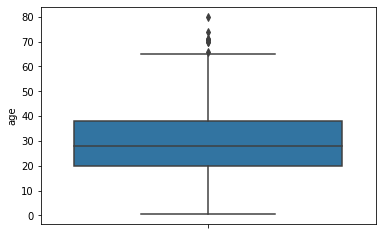

In [229]:
sns.boxplot(y='age', data=boat_clean) #we can see that in age data is moving away from it's normal range

c:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

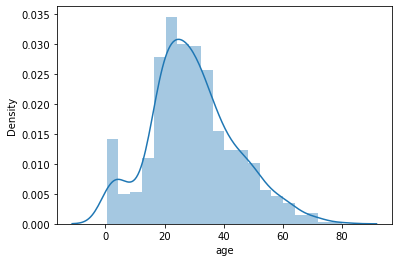

In [230]:
# let's observe outliers in a different angle.
sns.distplot(boat_clean['age']) 
#Grpah shows that bell curve is abnormal and values are going outside from curve, which is an abnormality.
#This is also called histogram and normality check.

In [231]:
# We know that data is abnormal, we can remove outliers from age and make it normal.

In [268]:
# removing outliers       # As outliers starting from 64 we will make the dataset less than of 64 years of age. 
boat_clean=boat_clean[boat_clean['age']< 64]
boat_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [269]:
# When we removed the NaN values, we have values like this (712, 14). Let's check after command removing outliers.
boat_clean.shape # Now we have values like this (557, 14). It's means we have removed outliers.

(557, 14)

<AxesSubplot:ylabel='age'>

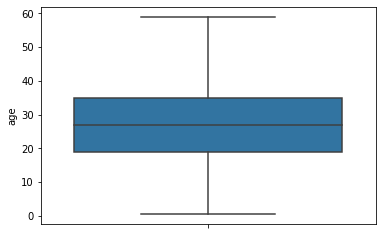

In [270]:
# Let's make boxplot to check whether outliers are removed or not?
sns.boxplot(y='age', data=boat_clean) #Yahooo! we have removed the outliers successfully.

In [248]:
#fare had so many outliers, that is the reason we using this function to bring down outliers.
boat_clean=boat_clean[boat_clean['fare']< 300]
boat_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


<AxesSubplot:>

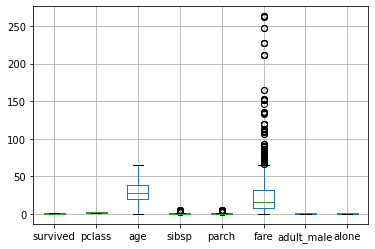

In [249]:
boat_clean.boxplot() 

In [262]:
# Let's remove rest of the outliers.
boat_clean=boat_clean[boat_clean['fare']< 50]
boat_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


<AxesSubplot:>

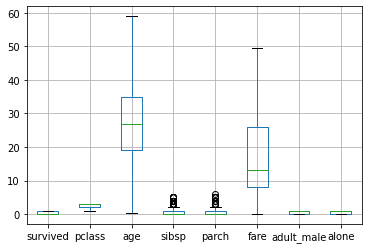

In [263]:
boat_clean.boxplot() #all outliers have been eradicated but, It is not always recomended to remove that kind of data.

<AxesSubplot:xlabel='survived'>

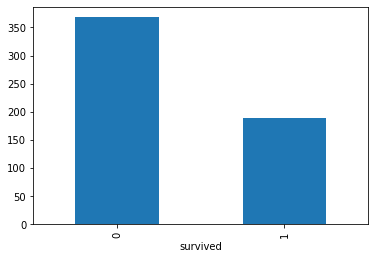

In [272]:
boat_clean.value_counts(boat_clean["survived"]).plot.bar()

<AxesSubplot:xlabel='sex'>

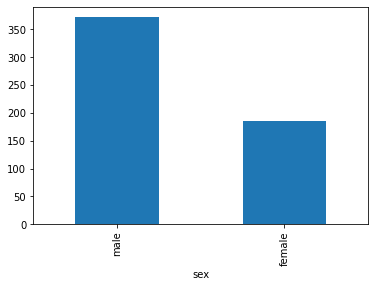

In [273]:
boat_clean.value_counts(boat_clean["sex"]).plot.bar()


<AxesSubplot:xlabel='class'>

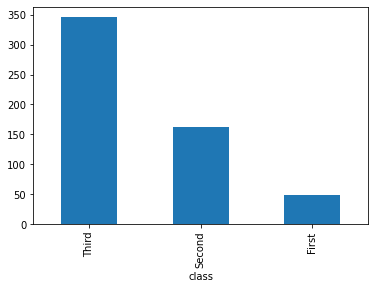

In [274]:
boat_clean.value_counts(boat_clean["class"]).plot.bar()

### Comparison of cleaned and uncleaned data

In [276]:
boat_clean.groupby(["sex", "class"]).mean()

survived  pclass        age     sibsp     parch       fare  \
sex    class                                                                
female First   0.916667     1.0  35.583333  0.083333  0.416667  33.344100   
       Second  0.916667     2.0  28.520833  0.486111  0.583333  20.755267   
       Third   0.455446     3.0  21.341584  0.831683  0.960396  15.937625   
male   First   0.459459     1.0  40.608108  0.000000  0.027027  27.068916   
       Second  0.155556     2.0  29.659222  0.333333  0.255556  18.357778   
       Third   0.142857     3.0  25.787429  0.506122  0.265306  11.517005   

               adult_male     alone  
sex    class                         
female First     0.000000  0.666667  
       Second    0.000000  0.416667  
       Third     0.000000  0.366337  
male   First     1.000000  0.972973  
       Second    0.900000  0.644444  
       Third     0.885714  0.730612

In [277]:
boat.groupby(["sex", "class"]).mean()

survived  pclass        age     sibsp     parch        fare  \
sex    class                                                                 
female First   0.968085     1.0  34.611765  0.553191  0.457447  106.125798   
       Second  0.921053     2.0  28.722973  0.486842  0.605263   21.970121   
       Third   0.500000     3.0  21.750000  0.895833  0.798611   16.118810   
male   First   0.368852     1.0  41.281386  0.311475  0.278689   67.226127   
       Second  0.157407     2.0  30.740707  0.342593  0.222222   19.741782   
       Third   0.135447     3.0  26.507589  0.498559  0.224784   12.661633   

               adult_male     alone  
sex    class                         
female First     0.000000  0.361702  
       Second    0.000000  0.421053  
       Third     0.000000  0.416667  
male   First     0.975410  0.614754  
       Second    0.916667  0.666667  
       Third     0.919308  0.760807

### - correlation

In [280]:
cor_boat_clean=boat_clean.corr()
cor_boat_clean

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.277943,-0.144599,-0.045972,0.099513,0.178261,-0.508602,-0.157274
pclass,-0.277943,1.000000,-0.328345,0.169859,0.100090,-0.476923,0.007727,-0.077131
age,-0.144599,-0.328345,1.000000,-0.395891,-0.215378,-0.071315,0.341867,0.331016
sibsp,-0.045972,0.169859,-0.395891,1.000000,0.414701,0.513593,-0.363123,-0.642768
parch,0.099513,0.100090,-0.215378,0.414701,1.000000,0.520802,-0.415899,-0.617558
fare,0.178261,-0.476923,-0.071315,0.513593,0.520802,1.000000,-0.341970,-0.519366
adult_male,-0.508602,0.007727,0.341867,-0.363123,-0.415899,-0.341970,1.000000,0.474856
alone,-0.157274,-0.077131,0.331016,-0.642768,-0.617558,-0.519366,0.474856,1.000000


<AxesSubplot:>

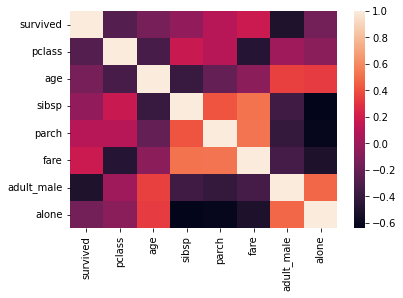

In [281]:
sns.heatmap(cor_boat_clean) #using color scheme we can interpret the results.

<AxesSubplot:>

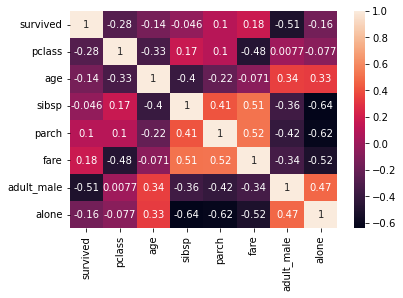

In [282]:
sns.heatmap(cor_boat_clean, annot=True) # Now we have both values and colors 

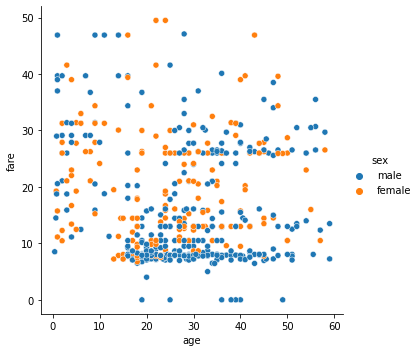

In [285]:
# We can also use relation plot to find correlation and can compare it with heatmap values.
sns.relplot(x="age", y="fare", hue="sex", data=boat_clean)

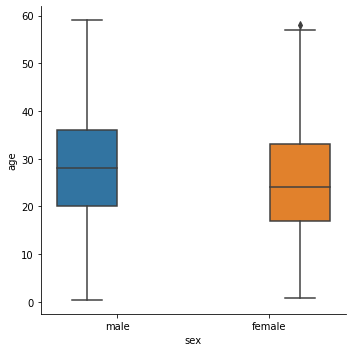

In [289]:
sns.catplot(x="sex", y="age", hue="sex", data=boat_clean, kind="box" )

In [290]:
# Let's use log function and make a box plot
boat_clean["fare_log"]=np.log(boat_clean["fare"])

c:\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [291]:
boat_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_log
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1.981001
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,2.070022
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,2.085672
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Southampton,no,False,3.048088
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False,2.409941


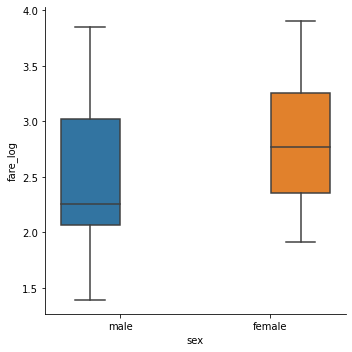

In [297]:
sns.catplot(x="sex", y="fare_log", hue="sex", data=boat_clean, kind="box" )